# Data Dictionary
**Variable** Meaning	Levels</br>
**Age**	Age of the employee	</br>
**Attrition**	Whether the employee left in the previous year or not	</br>
**BusinessTravel**	How frequently the employees travelled for business purposes in the last year	</br>
**Department**	Department in company	</br>
**DistanceFromHome**	Distance from home in kms	</br>
**Education**	Education Level</br>
        1 'Below College'
		2 'College'
		3 'Bachelor'
		4 'Master'
		5 'Doctor'</br>
**EducationField**	Field of education	</br>
**EmployeeCount**	Employee count	</br>
**EmployeeNumber**	Employee number/id	</br>
**EnvironmentSatisfaction**	Work Environment Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**Gender**	Gender of employee	</br>
**JobInvolvement**	Job Involvement Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**JobLevel**	Job level at company on a scale of 1 to 5	</br>
**JobRole**	Name of job role in company	</br>
**JobSatisfaction**	Job Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**MaritalStatus**	Marital status of the employee	</br>
**MonthlyIncome**	Monthly income in rupees per month	</br>
**NumCompaniesWorked**	Total number of companies the employee has worked for	</br>
**Over18**	Whether the employee is above 18 years of age or not	</br>
**PercentSalaryHike**	Percent salary hike for last year	</br>
**PerformanceRating**	Performance rating for last year	</br>
        1 'Low'
		2 'Good'
		3 'Excellent'
		4 'Outstanding'</br>
**RelationshipSatisfaction**	Relationship satisfaction level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**StandardHours**	Standard hours of work for the employee	</br>
**StockOptionLevel**	Stock option level of the employee	</br>
**TotalWorkingYears**	Total number of years the employee has worked so far	</br>
**TrainingTimesLastYear**	Number of times training was conducted for this employee last year	</br>
**WorkLifeBalance**	Work life balance level	</br>
        1 'Bad'
		2 'Good'
		3 'Better'
		4 'Best'</br>
**YearsAtCompany**	Total number of years spent at the company by the employee	
**YearsSinceLastPromotion**	Number of years since last promotion	
**YearsWithCurrManager**	Number of years under current manager	

In [1]:
# Common imports
import sqlite3
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set()
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [3]:
conn = sqlite3.connect("data/hr_data.db")
employee_survey = pd.read_sql_query("select * from employee_survey_data", conn)
general_data = pd.read_sql_query("select * from general_data", conn)
manager_survey = pd.read_sql_query("select * from manager_survey_data", conn)
in_time = pd.read_sql_query("select * from in_time", conn)
out_time = pd.read_sql_query("select * from out_time", conn)

all_data = pd.read_sql_query("select *, Case when Attrition ='Yes' then 1 else 0 end as 'Attr' from general_data g join employee_survey_data e on g.EmployeeID=e.EmployeeID join manager_survey_data m on g.EmployeeID=m.EmployeeID Where EnvironmentSatisfaction Not Like 'NA' AND JobSatisfaction Not Like 'NA' AND WorkLifeBalance Not Like 'NA' AND TotalWorkingYears Not Like 'NA' AND NumCompaniesWorked Not Like 'NA'", conn)
all_data['JobSatisfaction'] = all_data['JobSatisfaction'].astype(np.int64)
all_data['WorkLifeBalance'] = all_data['WorkLifeBalance'].astype(np.int64)
all_data['EnvironmentSatisfaction'] = all_data['EnvironmentSatisfaction'].astype(np.int64)

In [4]:
all_data['MonthlyIncome'].head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [5]:
all_data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EmployeeID                 False
EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
EmployeeID                 False
JobInvolvement             False
Performanc

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 32 columns):
Age                        4300 non-null int64
Attrition                  4300 non-null object
BusinessTravel             4300 non-null object
Department                 4300 non-null object
DistanceFromHome           4300 non-null int64
Education                  4300 non-null int64
EducationField             4300 non-null object
EmployeeCount              4300 non-null int64
EmployeeID                 4300 non-null int64
Gender                     4300 non-null object
JobLevel                   4300 non-null int64
JobRole                    4300 non-null object
MaritalStatus              4300 non-null object
MonthlyIncome              4300 non-null int64
NumCompaniesWorked         4300 non-null int64
Over18                     4300 non-null object
PercentSalaryHike          4300 non-null int64
StandardHours              4300 non-null int64
StockOptionLevel           4300 non-nul

In [7]:
all_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating,Attr
count,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,1.0,2211.695116,2.066977,65059.844186,2.690000,15.210698,8.0,...,2.190000,4.132558,2211.695116,2.723953,2.724884,2.761163,2211.695116,2.728837,3.153953,0.161628
std,9.146517,8.097059,1.024774,0.0,1272.117692,1.106633,47045.398914,2.495764,3.662777,0.0,...,3.230818,3.565831,1272.117692,1.093802,1.101875,0.707800,1272.117692,0.710769,0.360946,0.368152
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1110.750000,1.000000,29260.000000,1.000000,12.000000,8.0,...,0.000000,2.000000,1110.750000,2.000000,2.000000,2.000000,1110.750000,2.000000,3.000000,0.000000
50%,36.000000,7.000000,3.000000,1.0,2215.500000,2.000000,49360.000000,2.000000,14.000000,8.0,...,1.000000,3.000000,2215.500000,3.000000,3.000000,3.000000,2215.500000,3.000000,3.000000,0.000000
75%,43.000000,14.000000,4.000000,1.0,3314.250000,3.000000,83802.500000,4.000000,18.000000,8.0,...,3.000000,7.000000,3314.250000,4.000000,4.000000,3.000000,3314.250000,3.000000,3.000000,0.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,15.000000,17.000000,4409.000000,4.000000,4.000000,4.000000,4409.000000,4.000000,4.000000,1.000000


In [8]:
## Monthly salaries are in rupees 'INR'
from forex_python.converter import CurrencyRates

In [9]:
c = CurrencyRates()
c.get_rates('USD')

{'GBP': 0.8208635023,
 'HKD': 7.8367748279,
 'IDR': 14265.0040225261,
 'ILS': 3.4940556003,
 'DKK': 6.6723875927,
 'INR': 70.8098685975,
 'CHF': 0.9760436221,
 'MXN': 19.5496558505,
 'CZK': 22.9972289264,
 'SGD': 1.380262805,
 'THB': 30.7446142844,
 'HRK': 6.6005184589,
 'EUR': 0.8938946992,
 'MYR': 4.1870027711,
 'NOK': 8.8982747832,
 'CNY': 7.0189505676,
 'BGN': 1.7482792527,
 'PHP': 52.0863502279,
 'PLN': 3.8543845535,
 'ZAR': 14.8060248503,
 'CAD': 1.3216233128,
 'ISK': 122.0166264414,
 'BRL': 3.941986234,
 'RON': 4.2281219272,
 'NZD': 1.52614642,
 'TRY': 5.5337445249,
 'JPY': 106.4628586752,
 'RUB': 65.0734781443,
 'KRW': 1213.3011531242,
 'USD': 1.0,
 'AUD': 1.4719764012,
 'HUF': 290.8286403862,
 'SEK': 9.58854027}

In [10]:
ex_rate = c.convert('USD', 'INR', .01)
ex_rate

0.708098685975

In [11]:
all_data['MonthlyIncome'].head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [12]:
all_data['MonthlyIncome'].describe()

count      4300.000000
mean      65059.844186
std       47045.398914
min       10090.000000
25%       29260.000000
50%       49360.000000
75%       83802.500000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [13]:
all_data['MonthlyIncomeUSD'] = all_data['MonthlyIncome']*ex_rate
all_data['MonthlyIncomeUSD'].head()

0     92874.223652
1     29662.253955
2    136861.314025
3     58920.891660
4     16583.671226
Name: MonthlyIncomeUSD, dtype: float64

In [14]:
all_data['MonthlyIncomeUSD'].describe()

count      4300.000000
mean      46068.790178
std       33312.785152
min        7144.715741
25%       20718.967552
50%       34951.751140
75%       59340.440131
max      141612.656208
Name: MonthlyIncomeUSD, dtype: float64

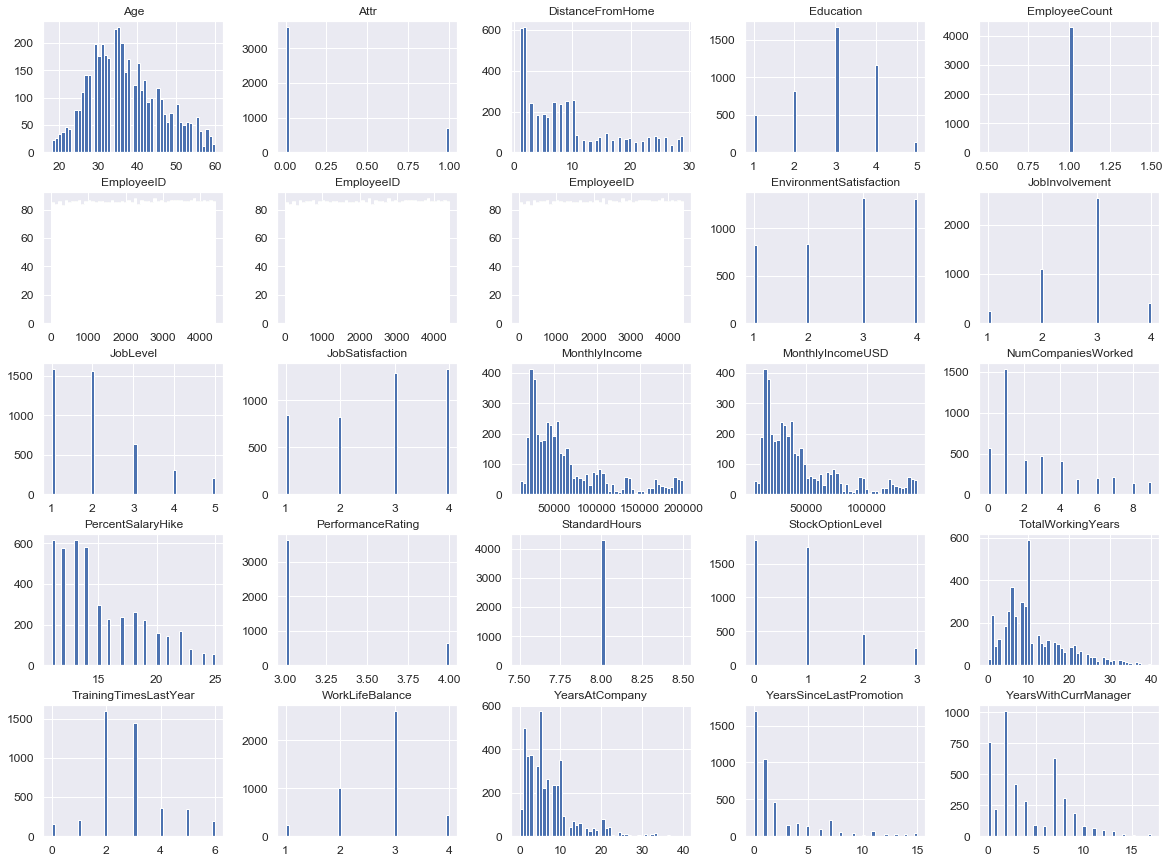

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
# Creates a folder in the current directory called data
createFolder('images')
all_data.hist(bins=50, figsize=(20,15))
plt.savefig('images/general_data.png')
plt.show()

In [16]:
#drop the useless columns:
all_data.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1, inplace = True)

In [17]:
corr_cols = all_data[['Age','Attr','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncomeUSD', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

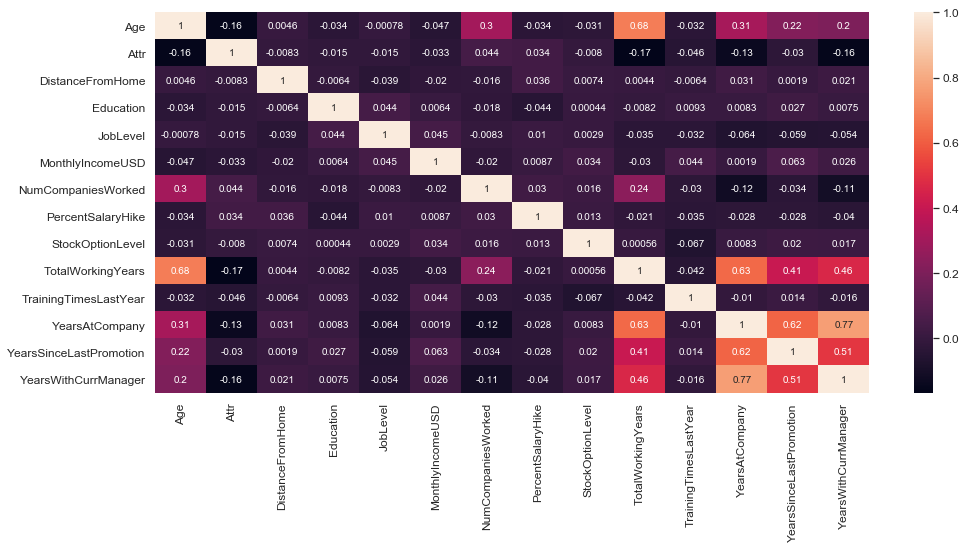

In [18]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
all_data["Attrition"].value_counts()

No     3605
Yes     695
Name: Attrition, dtype: int64

In [20]:
attrition_rate = (695/3605)
attrition_rate

0.1927877947295423

In [21]:
all_data["BusinessTravel"].value_counts()

Travel_Rarely        3051
Travel_Frequently     809
Non-Travel            440
Name: BusinessTravel, dtype: int64

In [22]:
all_data["Department"].value_counts()

Research & Development    2807
Sales                     1307
Human Resources            186
Name: Department, dtype: int64

In [23]:
all_data["EducationField"].value_counts()

Life Sciences       1766
Medical             1364
Marketing            469
Technical Degree     384
Other                237
Human Resources       80
Name: EducationField, dtype: int64

In [24]:
all_data["Gender"].value_counts()

Male      2571
Female    1729
Name: Gender, dtype: int64

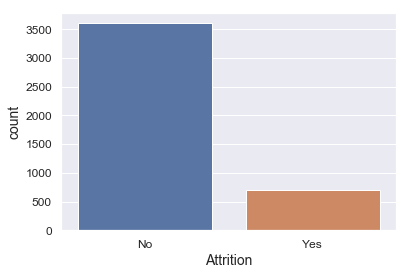

In [25]:
sns.countplot(x = "Attrition",data=all_data)
plt.show()

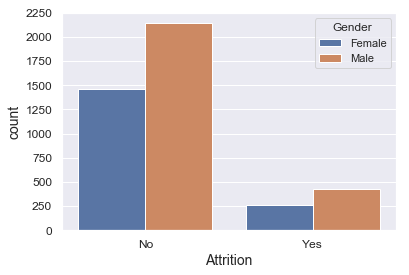

In [26]:
sns.countplot(x = "Attrition",data=all_data,hue="Gender")
plt.show()

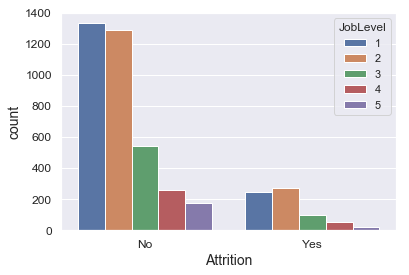

In [27]:
sns.countplot(x = "Attrition",data=all_data,hue="JobLevel")
plt.show()

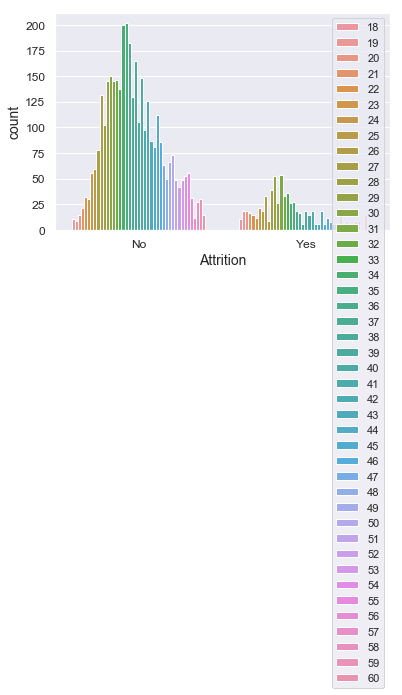

In [28]:
sns.countplot(x = "Attrition",data=all_data,hue="Age")
plt.legend(loc='upper right')
plt.show()

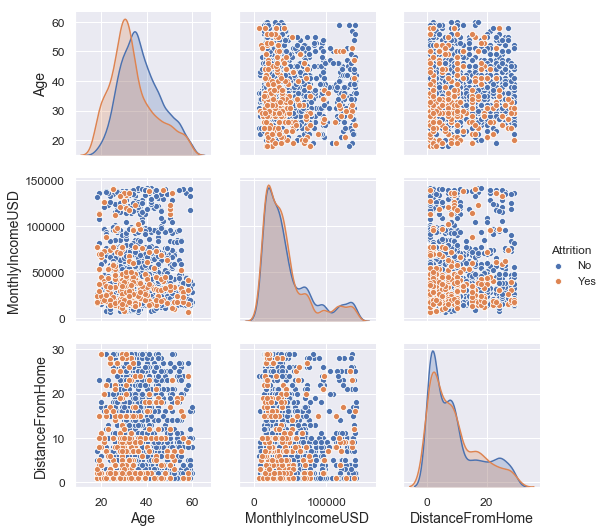

In [29]:
sns.pairplot(all_data[['Age','MonthlyIncomeUSD','DistanceFromHome','Attrition']],hue = 'Attrition')